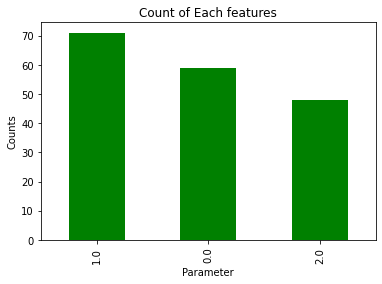

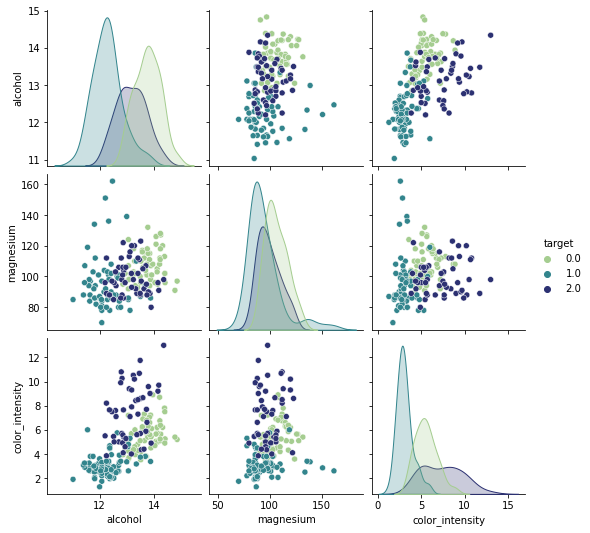

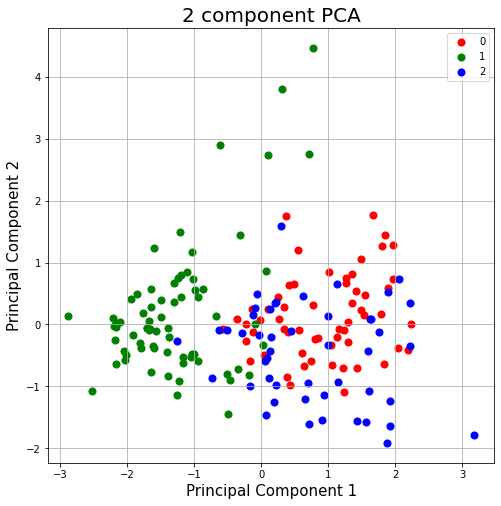

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_wine
df=load_wine()
df=pd.DataFrame(data=np.c_[df['data'],df['target']], columns=df['feature_names']+['target'])
df.head()
df.shape
df.columns
freq = df['target'].value_counts()
plt.xlabel('Parameter')
plt.ylabel('Counts')
plt.title('Count of Each features')
freq.plot(kind='bar',color="green")
df = df[['alcohol','magnesium','color_intensity','target']]
sns.pairplot(df,hue='target',palette="crest")
from sklearn.preprocessing import StandardScaler
features = ['alcohol', 'magnesium','color_intensity']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['target']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)
# Scaled Dataset
df_scaled = pd.DataFrame(x)
"""## Applying PCA"""
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
principalDf.head()
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)
finalDf.head()
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1, 2]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
  indicesToKeep = finalDf['target'] == target
  ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'],
finalDf.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)
ax.legend(targets)
ax.grid()

In [5]:
df.head()


,alcohol,magnesium,color_intensity,target
0,14.23,127.0,5.64,0.0
1,13.20,100.0,4.38,0.0
2,13.16,101.0,5.68,0.0
3,14.37,113.0,7.80,0.0
4,13.24,118.0,4.32,0.0


In [6]:
finalDf.head()


,principal component 1,principal component 2,target
0,1.966082,1.283706,0.0
1,-0.015728,0.073984,0.0
2,0.334609,-0.067353,0.0
3,2.243218,0.006116,0.0
4,0.541480,1.206477,0.0
